In [2]:
!ls -al ../input


total 16
drwxr-xr-x 4 root root 4096 May 29 12:50 .
drwxr-xr-x 6 root root 4096 May 29 12:50 ..
drwxr-xr-x 2 root root 4096 May 29 12:07 4thbig-calhouse
drwxr-xr-x 2 root root 4096 Dec  5 23:02 california-housing-prices


In [3]:
!ls -al ../input/california-housing-prices

total 1400
drwxr-xr-x 2 root root    4096 Dec  5 23:02 .
drwxr-xr-x 4 root root    4096 May 29 12:50 ..
-rw-r--r-- 1 root root 1423529 Dec  5 23:02 housing.csv


### 데이터 다운로드

In [4]:
import os
import tarfile
from six.moves import urllib

DATA_DIR = "./datasets"

# 디렉토리 만들기
if not os.path.isdir(DATA_DIR):
    os.makedirs(DATA_DIR)
    
# housing.tgz 다운로드
DATA_PATH = os.path.join(DATA_DIR, "housing.tgz")
urllib.request.urlretrieve(
    #"https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz",
    "https://www.kaggle.com/mysomang/housingtgz",
    DATA_PATH)

# 압축 풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [6]:
DATA_DIR = "../input/california-housing-prices"

#### 데이터 구조 살펴보기

In [7]:
# CSV 파일 읽기
import pandas as pd

def load_data(file_dir=DATA_DIR):
    csv_file = os.path.join(file_dir, "housing.csv")
    return pd.read_csv(csv_file)
    
housing = load_data()


In [8]:
type(housing)

pandas.core.frame.DataFrame

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


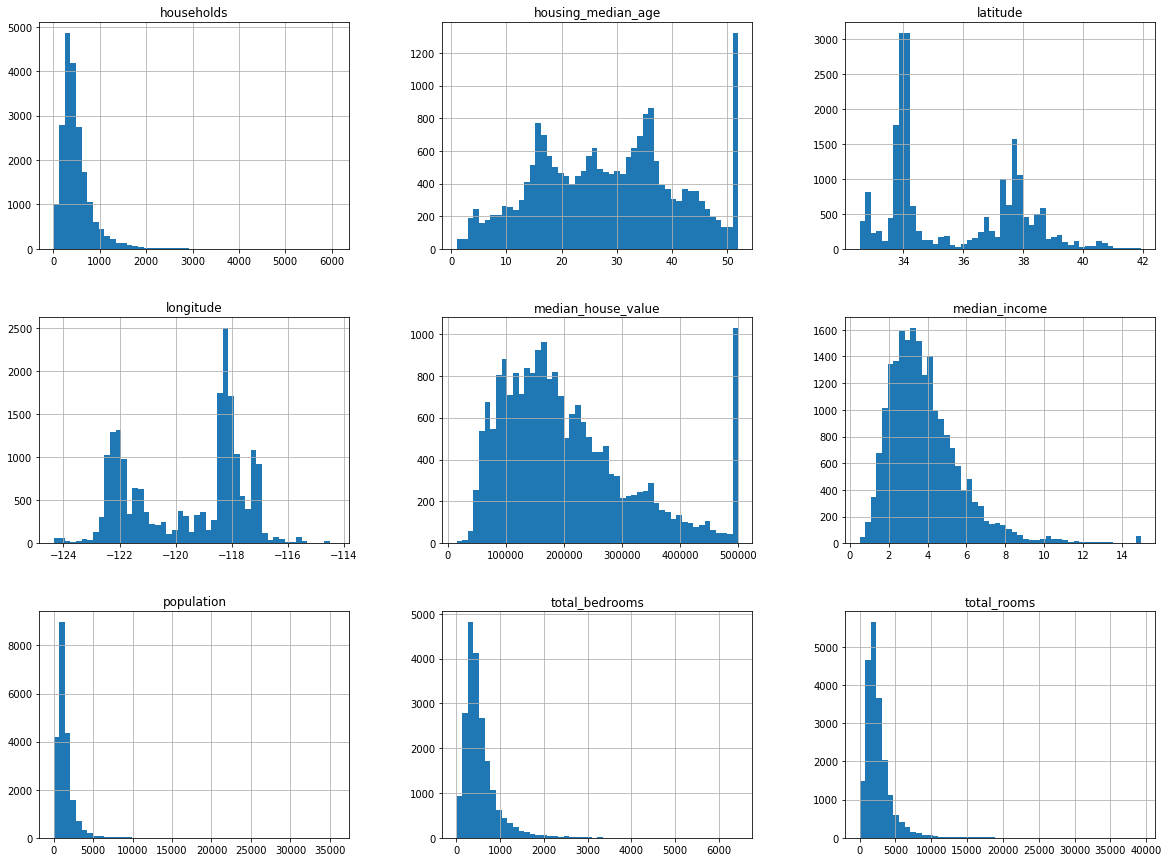

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


#### 테스트 데이터 셋 만들기

In [14]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train : test = 80 : 20
train_set, test_set = split_train_test(housing, 0.2)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


In [15]:
from sklearn.model_selection import train_test_split

# train : test = 80 : 20
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=42)
print("train: {}, test: {}".format(len(train_set), len(test_set)))

train: 16512, test: 4128


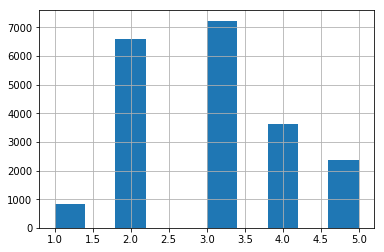

In [16]:
# 소득의 카테고리 만들기
# 1.5 : 소득 카테고리 수를 제한하기 위한 값
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# 히스토그램
housing["income_cat"].hist()

In [17]:
housing["income_cat"]

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [18]:
housing["income_cat"].describe()

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: income_cat, dtype: float64

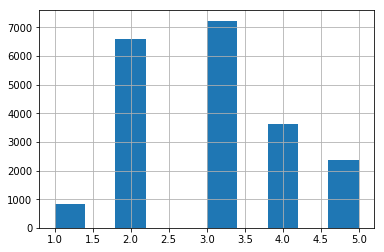

In [19]:
housing["income_cat"].hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# 소득 카테고리 비율 살펴보기
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

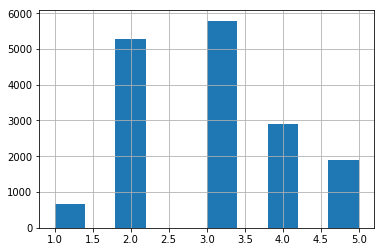

In [21]:
strat_train_set["income_cat"].hist()

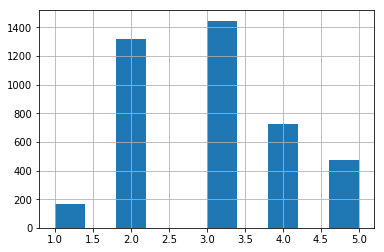

In [22]:
strat_test_set["income_cat"].hist()

In [23]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [25]:
type(housing["income_cat"])

pandas.core.series.Series

### 탐색과 시각화

#### 지리적 데이터 시각화

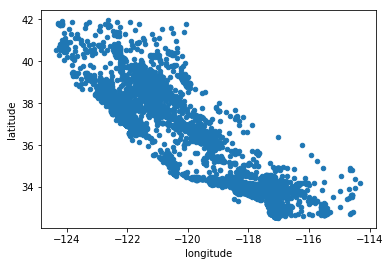

In [26]:
# 훈련 데이터 복사
housing = strat_train_set.copy()

# 위도, 경도에 따른 산점도 그리기
housing.plot(kind="scatter", x="longitude", y="latitude")

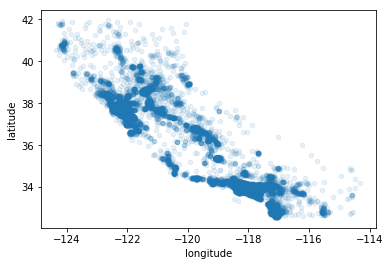

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

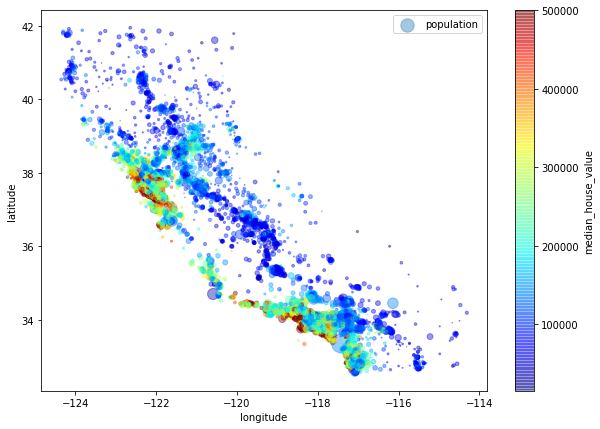

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True, sharex=False)
plt.legend()

In [29]:
type(housing)

pandas.core.frame.DataFrame

In [30]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000


In [31]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f419f0b0eb8>,
      dtype=object)

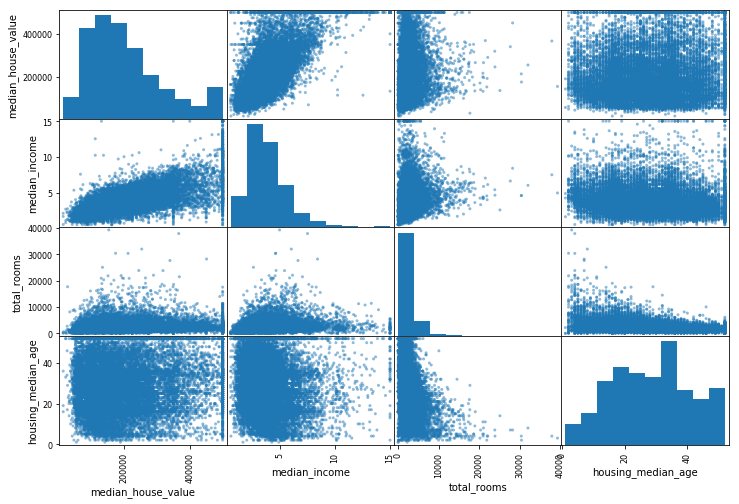

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

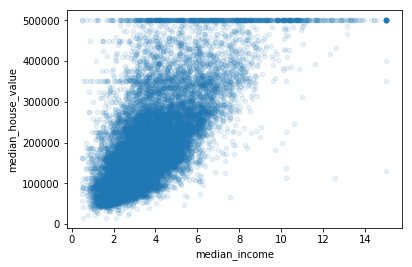

In [33]:
housing.plot(kind="scatter", x="median_income", 
             y="median_house_value", alpha=0.1)

#### 특성들의 조합

In [34]:
housing["rooms_per_household"] = \
    housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = \
    housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = \
    housing["population"]/housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 알고리즘용 데이터 준비

### 데이터 정제

In [36]:
# 훈련 데이터 복사
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [37]:
# 해당 구역을 제거
housing2 = housing.dropna(subset=["total_bedrooms"])
housing2.count()

longitude             16354
latitude              16354
housing_median_age    16354
total_rooms           16354
total_bedrooms        16354
population            16354
households            16354
median_income         16354
ocean_proximity       16354
income_cat            16354
dtype: int64

In [38]:
# 특정 값으로 채움
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [39]:
# 전체 특성을 삭제
housing2 = housing.drop("total_bedrooms", axis=1)
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [40]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer

# 중간값으로 대체하는 객체 생성
# mean, median, most_frequent, constant
imputer = Imputer(strategy="median")
# 수치형 데이터만 선택
housing_num = housing.drop("ocean_proximity", axis=1)
# 학습 및 변환
imputer.fit(housing_num)
X = imputer.transform(housing_num)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
# pandas DataFrame 으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns,
                         index=list(housing.index.values))
housing_df.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

In [42]:
housing.index

Int64Index([17606, 18632, 14650,  3230,  3555, 19480,  8879, 13685,  4937,
             4861,
            ...
            15270,  3754, 12166,  6003,  7364,  6563, 12053, 13908, 11159,
            15775],
           dtype='int64', length=16512)

In [43]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [44]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


#### 텍스트와 범주형 데이터

In [45]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [46]:
housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3]),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [47]:
type(housing_cat)

pandas.core.series.Series

In [48]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [49]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# fit_transform()에는 2차원 배열을 넣어야 함
housing_cat_1hot = encoder.fit_transform(
                housing_cat_encoded.reshape(-1,1))
# 출력은 sparse matrix (scipy.sparse.csr.csr_matrix)
housing_cat_1hot

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [52]:
# shape : (16354, 5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [53]:
housing_cat_1hot.toarray().shape

(16512, 5)

In [54]:
from sklearn.preprocessing import OrdinalEncoder
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = \
            ordinal_encoder.fit_transform(housing_cat_2d)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [55]:
type(housing_cat_2d)

pandas.core.frame.DataFrame

In [56]:
housing_cat_2d.shape

(16512, 1)

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [59]:
# 2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing_cat.values.reshape(-1,1)

# default : sparse=True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [60]:
housing_cat

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
16365        INLAND
19684        INLAND
19234     <1H OCEAN
13956        INLAND
2390         INLAND
11176     <1H OCEAN
15614      NEAR BAY
2953         INLAND
13209        INLAND
6569         INLAND
5825      <1H OCEAN
18086     <1H OCEAN
16718     <1H OCEAN
13600        INLAND
13989        INLAND
15168     <1H OCEAN
6747      <1H OCEAN
7398      <1H OCEAN
5562      <1H OCEAN
16121      NEAR BAY
            ...    
12380        INLAND
5618     NEAR OCEAN
10060        INLAND
18067     <1H OCEAN
4471      <1H OCEAN
19786        INLAND
9969         INLAND
14621    NEAR OCEAN
579        NEAR BAY
11682     <1H OCEAN
245        NEAR BAY
12130        INLAND
16441        INLAND
11016     <1H OCEAN
19934        INLAND
1364       NEAR BAY
1236         INLAND
5364      <1H OCEAN
11703     <1H OCEAN


In [61]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,3.006541
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [62]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [63]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
5825     280900.0
18086    500001.0
16718    171300.0
13600    116600.0
13989     60800.0
15168    121100.0
6747     270700.0
7398     109900.0
5562     159600.0
16121    500001.0
           ...   
12380    122500.0
5618     350000.0
10060    172800.0
18067    500001.0
4471     146600.0
19786     81300.0
9969     247600.0
14621    164100.0
579      254900.0
11682    185700.0
245      126800.0
12130    114200.0
16441    101800.0
11016    265600.0
19934     88900.0
1364     225000.0
1236     123500.0
5364     500001.0
11703    321600.0
10356    266000.0
15270    346700.0
3754     190200.0
12166    148800.0
6003     214800.0
7364     1

In [64]:
housing_num=housing.drop("ocean_proximity",axis=1)
imputer = Imputer(strategy="median")
imputer.fit(housing_num)
X1 = imputer.transform(housing_num)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [67]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [68]:
X2


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [69]:
from sklearn.compose import ColumnTransformer

# list 타입
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 14)

In [70]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [71]:
housing_prepared.shape

(16512, 14)

## 모델 선택과 모델 학습

In [72]:
# 선형 회귀 모델 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# 학습
lin_reg.fit(housing_prepared, housing_labels)
# 예측
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

predict:
[205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]
target:
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [73]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, 
                             housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68867.01067610044

In [74]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 모델 선택
tree_reg = DecisionTreeRegressor()
# 모델 학습
tree_reg.fit(housing_prepared, housing_labels)
# 예측
housing_predict = tree_reg.predict(housing_prepared)
# 평가
tree_mse = mean_squared_error(housing_labels, 
                             housing_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### 교차 검증

In [75]:
from sklearn.model_selection import cross_val_score
# Linear regression
scores = cross_val_score(lin_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("LinearRegression score:", scores_rmse.mean())
# Decisoin tree
scores = cross_val_score(tree_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("DecisionTree score", scores_rmse.mean())

LinearRegression score: 69049.01752253594
DecisionTree score 69679.45019676254


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, 
                         housing_prepared,
                         housing_labels, 
                         scoring="neg_mean_squared_error", 
                         cv=10)
scores_rmse = np.sqrt(-scores)
print("RandomForest score", scores_rmse.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest score 52233.87018777621


In [77]:
housing_predict = forest_reg.predict(housing_prepared)
np.sqrt(mean_squared_error(housing_labels, housing_predict))

21909.07160456687

#### Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV
# 파라미터 조합
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10],
                                'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
# grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [79]:
# 최적값 확인
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [80]:
# score 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
                             cvres["params"]):
    print(np.sqrt(-mean_score), params)

63795.5361244805 {'max_features': 2, 'n_estimators': 3}
56470.42819233007 {'max_features': 2, 'n_estimators': 10}
54211.487565913754 {'max_features': 2, 'n_estimators': 30}
61710.478032494866 {'max_features': 4, 'n_estimators': 3}
54432.03594720758 {'max_features': 4, 'n_estimators': 10}
52226.133463379694 {'max_features': 4, 'n_estimators': 30}
60595.56993509067 {'max_features': 6, 'n_estimators': 3}
53590.15482577992 {'max_features': 6, 'n_estimators': 10}
51536.407893965785 {'max_features': 6, 'n_estimators': 30}
60022.55763918045 {'max_features': 8, 'n_estimators': 3}
53114.92669858696 {'max_features': 8, 'n_estimators': 10}
51309.00718069413 {'max_features': 8, 'n_estimators': 30}
63017.31619447886 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55596.12206533152 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61746.04963990032 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54083.05607096033 {'bootstrap': False, 'max_features': 3, 'n_estimators':

#### 최종 모델 평가

In [81]:
# 최종 모델 선택
final_model = grid_search.best_estimator_

# test dataset 으로 평가
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 전처리
X_test_prepared = full_pipeline.transform(X_test)
# 최종 예측
final_predict = final_model.predict(X_test_prepared)
# 평가
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

48376.509248786235

In [82]:
!ls -al

total 20
drwxr-xr-x 4 root root 4096 May 29 12:52 .
drwxr-xr-x 6 root root 4096 May 29 12:50 ..
drwxr-xr-x 2 root root 4096 May 29 12:50 .ipynb_checkpoints
-rw-r--r-- 1 root root  199 May 29 12:50 __notebook_source__.ipynb
drwxr-xr-x 2 root root 4096 May 29 12:52 datasets


## 제출


In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!ls -al

In [83]:
# read test data
df_test = pd.read_csv("../input/4thbig-calhouse/test.csv")

# 전처리
df_test = df_test.drop("id", axis=1)
df_test["income_cat"] = np.ceil(housing["median_income"] / 1.5)
X_test = full_pipeline.transform(df_test)
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-119.40,36.04,39,915,199.0,580,175,1.8894,INLAND,6.0
1,-119.27,36.05,29,1016,174.0,481,140,2.2917,INLAND,6.0
2,-119.21,36.10,30,1471,373.0,1418,357,1.7432,INLAND,5.0
3,-119.19,36.06,29,1815,376.0,1421,339,1.9091,INLAND,4.0
4,-119.19,36.14,41,759,140.0,408,129,3.9000,INLAND,3.0


In [84]:
X_test

array([[ 0.08783793,  0.18728909,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1527795 ,  0.19196637,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18275253,  0.21535279,  0.10711486, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.82134397,  1.77288844, -0.92673619, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87129902,  1.77288844, -0.84720919, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83133498,  1.74482474, -1.0062632 , ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
# 최종 예측
final_predict = final_model.predict(X_test)


In [86]:
final_predict.shape

(640,)

In [87]:
submission = pd.read_csv("../input/4thbig-calhouse/submitSample.csv")
submission.head()

,id,median_house_value
0,20001,200000
1,20002,200000
2,20003,200000
3,20004,200000
4,20005,200000


In [88]:
submission["median_house_value"] = final_predict
submission.head()

,id,median_house_value
0,20001,143870.000000
1,20002,132296.700000
2,20003,104326.666667
3,20004,96043.333333
4,20005,83756.666667


In [89]:
submission.to_csv('MySubmission.csv', index=False)

In [90]:
!ls -al

total 36
drwxr-xr-x 4 root root  4096 May 29 12:57 .
drwxr-xr-x 6 root root  4096 May 29 12:50 ..
drwxr-xr-x 2 root root  4096 May 29 12:50 .ipynb_checkpoints
-rw-r--r-- 1 root root 13872 May 29 12:57 MySubmission.csv
-rw-r--r-- 1 root root   199 May 29 12:50 __notebook_source__.ipynb
drwxr-xr-x 2 root root  4096 May 29 12:52 datasets


In [91]:
!head -5 MySubmission.csv

id,median_house_value
20001,143870.0
20002,132296.7
20003,104326.66666666667
20004,96043.33333333333


In [92]:
!tail -5 MySubmission.csv

20636,95186.66666666667
20637,102506.66666666667
20638,92093.33333333333
20639,99703.33333333333
20640,100566.66666666667


In [ ]:
#from google.colab import files
#files.download("MySubmission.csv")